In [118]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

from mpl_toolkits.mplot3d import Axes3D

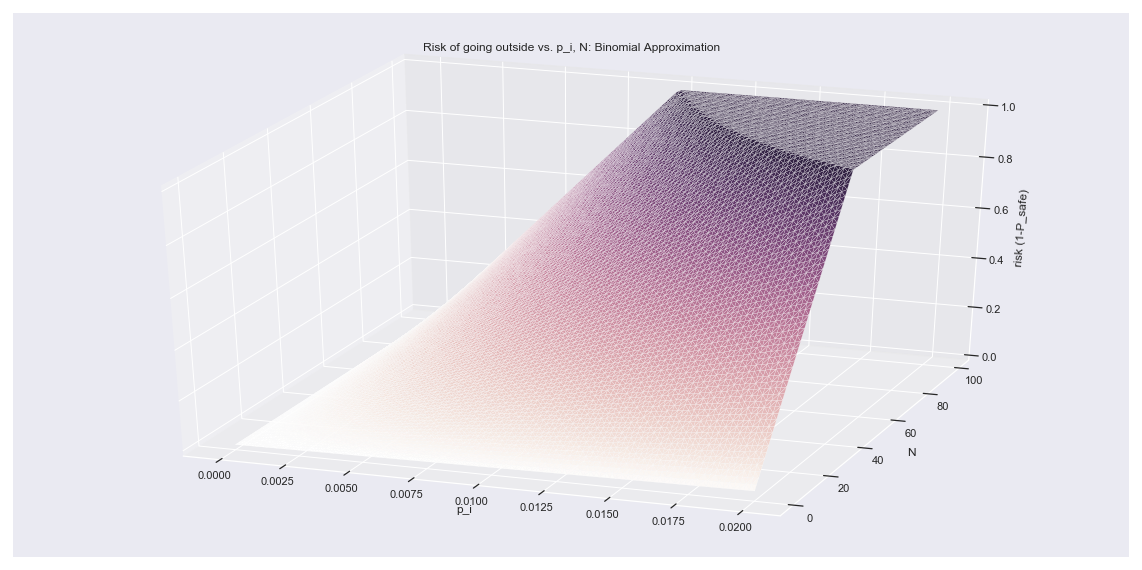

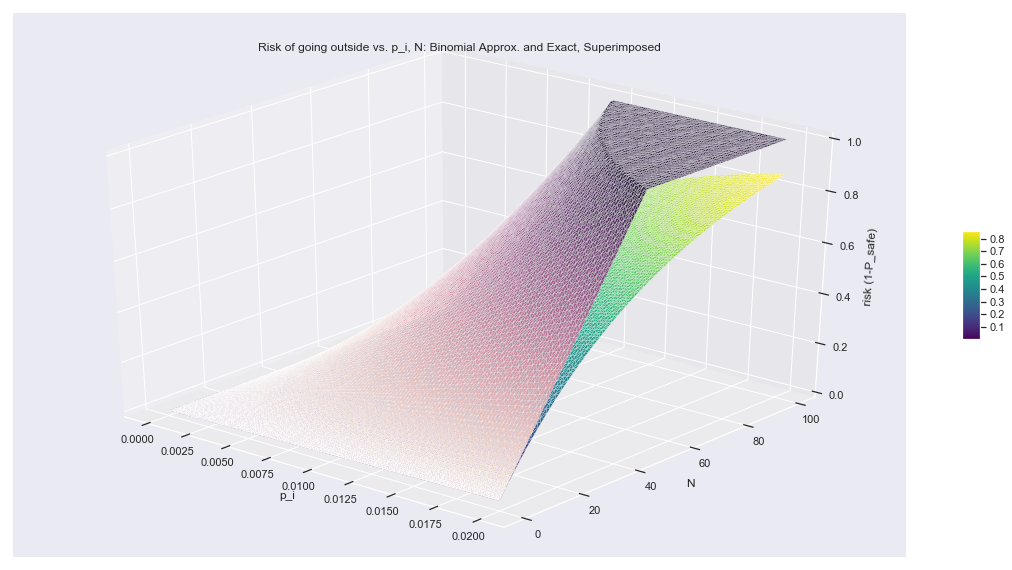

In [121]:
num_steps = 100
N = 100
p_i_max = 0.02
N_list = np.linspace(1, N, num=num_steps)
p_i_list = np.linspace(0, p_i_max, num=num_steps)

## Make the binomial approximation and exact surface plots

## BINOM APPROX PLOT
##
binom_approx_grid = [[1-max((1-N*p_i), 0) for N in N_list] for p_i in p_i_list]
binom_approx_df = pd.DataFrame(binom_approx_grid, columns=N_list, index=p_i_list)
data = binom_approx_df
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
colors=sns.cubehelix_palette(light=1, as_cmap=True)
#colors=sns.cubehelix_palette(8, as_cmap=True)
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=colors, linewidth=0.2)
# label the axes
ax.set_xlabel("p_i")
ax.set_ylabel("N")
ax.set_zlabel("risk (1-P_safe)")
ax.set_title("Risk of going outside vs. p_i, N: Binomial Approximation")
# rotate
ax.view_init(30, 290) # ax.view_init(45, 340) # for p_s, rather than risk
# add color bar
#fig.colorbar( surf, shrink=0.2, aspect=6)
plt.show()
 
# Rotate it
ax.view_init(30, 55)
plt.show()


## EXACT PLOT
##
exact_grid = [[1-(1-p_i)**N for N in N_list] for p_i in p_i_list]
exact_df = pd.DataFrame(exact_grid, columns=N_list, index=p_i_list)
data = exact_df # pd.read_csv(url)
 
# Transform it to a long format
df2=data.unstack().reset_index()
df2.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df2['X']=pd.Categorical(df2['X'])
df2['X']=df2['X'].cat.codes
 
# Make the plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
colors=sns.cubehelix_palette(light=1, as_cmap=True)
#colors=sns.cubehelix_palette(8, as_cmap=True)
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=colors, linewidth=0.2, antialiased=True)
surf = ax.plot_trisurf(df2['Y'], df2['X'], df2['Z'], cmap=plt.cm.viridis, linewidth=0.2, antialiased=True)
fig.colorbar( surf, shrink=0.2, aspect=6)
# label the axes
ax.set_xlabel("p_i")
ax.set_ylabel("N")
ax.set_zlabel("risk (1-P_safe)")
ax.set_title("Risk of going outside vs. p_i, N: Binomial Approx. and Exact, Superimposed")
# rotate
ax.view_init(30, 310) # ax.view_init(45, 340) # for p_s, rather than risk
# add color bar
plt.show()

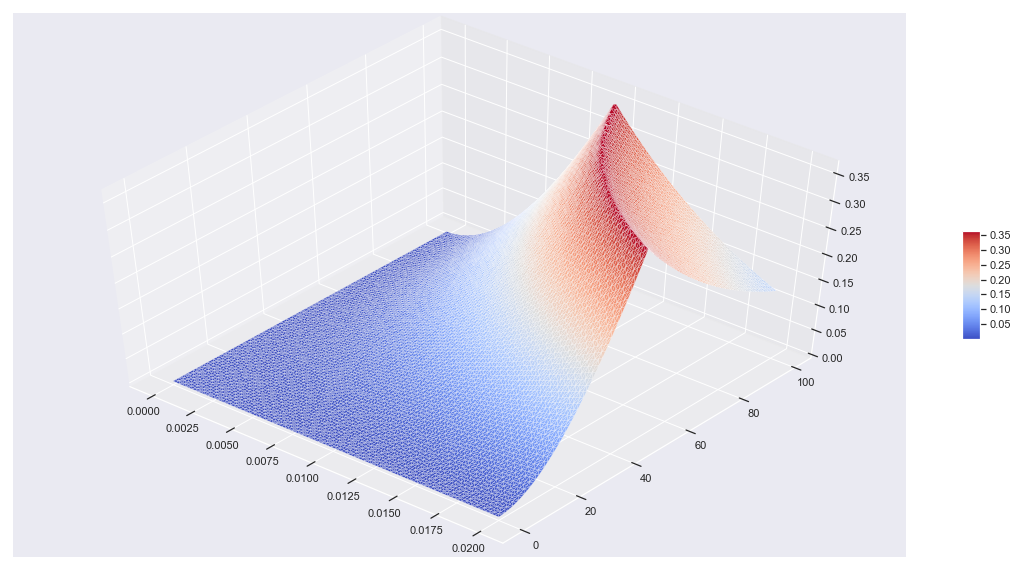

In [122]:
## ERROR SURFACE
##
error_grid = [[binom_approx_grid[p_i][N] - exact_grid[p_i][N] for N in range(len(N_list))] for p_i in range(len(p_i_list))]
error_df = pd.DataFrame(error_grid, columns=N_list, index=p_i_list)
data = error_df # pd.read_csv(url)
 
# Transform it to a long format
df2=data.unstack().reset_index()
df2.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df2['X']=pd.Categorical(df2['X'])
df2['X']=df2['X'].cat.codes
 
# Make the plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
colors=sns.cubehelix_palette(light=1, as_cmap=True)
#colors=sns.cubehelix_palette(8, as_cmap=True)
surf = ax.plot_trisurf(df2['Y'], df2['X'], df2['Z'], cmap=plt.cm.coolwarm, linewidth=0.2, antialiased=True)
fig.colorbar( surf, shrink=0.2, aspect=6)
# label the axes
#ax.set_title("Risk of going outside vs. p_i, N: \nBinomial Approx. and Exact, Superimposed", fontsize=20)
# rotate
ax.view_init(50, 310) # ax.view_init(45, 340) # for p_s, rather than risk
# add color bar
plt.show()

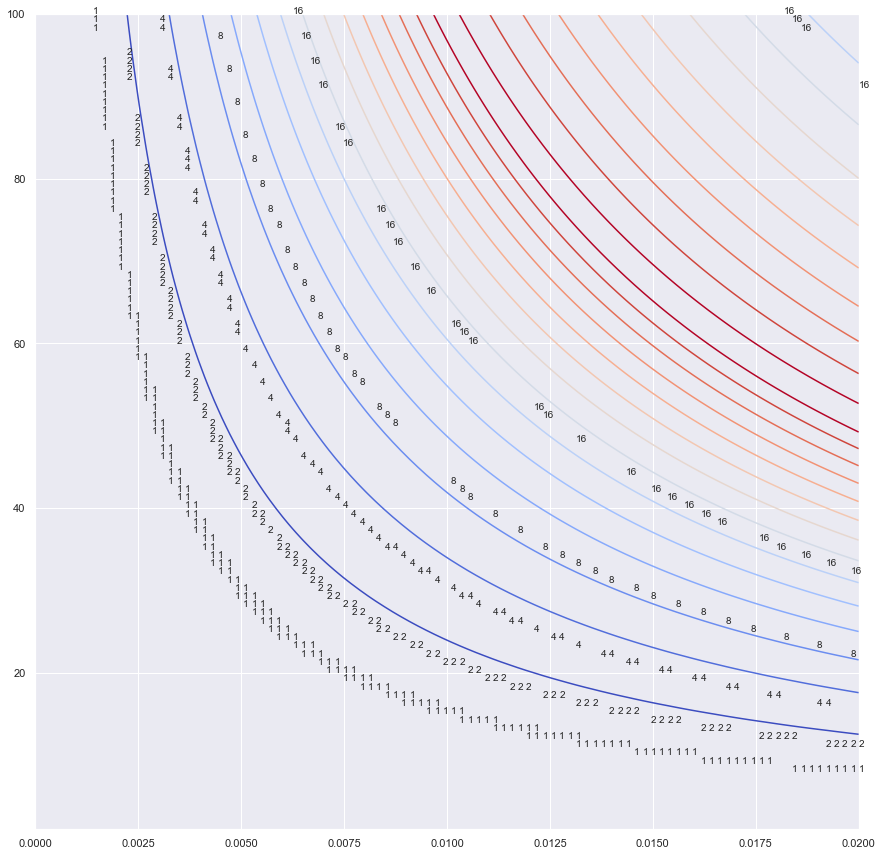

In [39]:
## ERROR HEATMAP
##
def closeTo(val):
    center_point = 0.01
    var = 0.001
    if ((val < center_point + var) and (val > center_point - var)):
        return 1
    else:
        if ((val < center_point*2 + var) and (val > 2*center_point - var)):
            return 2
        else:
            if ((val < center_point*4 + var) and (val > 4*center_point - var)):
                return 4
            else:
                if ((val < center_point*8 + var) and (val > 8*center_point - var)):
                    return 8
                else:
                    if ((val < center_point*16 + var) and (val > 16*center_point - var)):
                        return 16
                    else:
                        return 0
                    
def isApprox(val, center_point):
    var = 0.001
    if ((val < center_point + var) and (val > center_point - var)):
        return True
    else:
        return False

num_steps = 100
N = 100
p_i_max = 0.02
N_list = np.linspace(1, N, num=num_steps)
p_i_list = np.linspace(0, p_i_max, num=num_steps)

error_binary_grid = [[error_grid[N][p_i] > 0.02 for N in range(len(N_list))] for p_i in range(len(p_i_list))]
error_binary_grid = [[closeTo(error_grid[N][p_i]) for N in range(len(N_list))] for p_i in range(len(p_i_list))]
error_binary_df = pd.DataFrame(error_binary_grid, columns=N_list, index=p_i_list)
# heat_map = sns.heatmap(error_binary_df, cmap='coolwarm', robust=True, square=True)

#nz = np.nonzero(error_binary_grid)
#y_arr = [N_list[i] for i in nz[1]] # TODO double-check that this is the right rotation
#x_arr = [p_i_list[i] for i in nz[0]]
#plt.scatter(x_arr, y_arr)

fig = plt.figure(figsize=(15,15))
X, Y = np.meshgrid(N_list, p_i_list)
plt.contour(Y, X, error_df.T, 15, cmap=plt.cm.coolwarm);

# error scatter plots
ax = plt.axes()
ax.set_aspect(0.0002)

def error_isocline(error_percent):
    eg1 = [[isApprox(error_binary_grid[N][p_i], error_percent) for N in range(len(N_list))] for p_i in range(len(p_i_list))]
    nz = np.nonzero(eg1)
    y_arr = [N_list[i] for i in nz[1]] # TODO double-check that this is the right rotation
    x_arr = [p_i_list[i] for i in nz[0]]
    # loop through each x,y pair
    for i,j in zip(x_arr, y_arr):
        corr = -0.0001 # adds a little correction to put annotation in marker's centrum
        ax.annotate(str(error_percent),  xy=(i, j))

# 1%
error_isocline(1)
error_isocline(2)
error_isocline(4)
error_isocline(8)
error_isocline(16)

plt.show()


In [159]:
## error fit but with p, N going way higher


num_steps = 150
N = 500
p_i_max = 0.1
N_list = np.linspace(1, N, num=num_steps)
p_i_list = np.linspace(0, p_i_max, num=num_steps)

binom_approx_grid = [[1-max((1-N*p_i), 0) for N in N_list] for p_i in p_i_list]
binom_approx_df = pd.DataFrame(binom_approx_grid, columns=N_list, index=p_i_list)

exact_grid = [[1-(1-p_i)**N for N in N_list] for p_i in p_i_list]
exact_df = pd.DataFrame(exact_grid, columns=N_list, index=p_i_list)

error_grid = [[binom_approx_grid[p_i][N] - exact_grid[p_i][N] for N in range(len(N_list))] for p_i in range(len(p_i_list))]
error_df = pd.DataFrame(error_grid, columns=N_list, index=p_i_list)

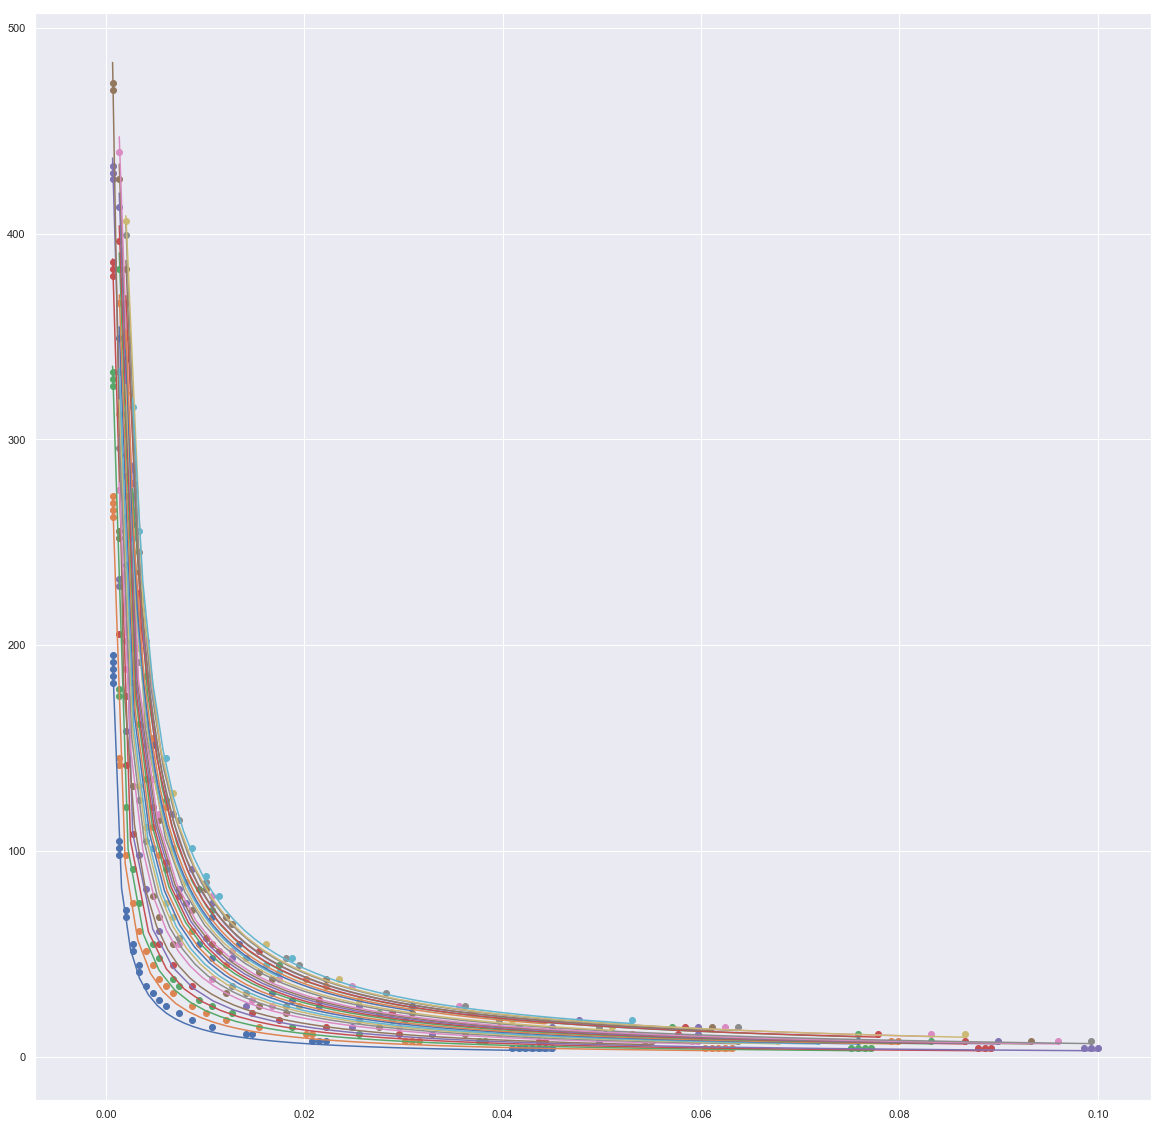

In [167]:
# This is the all-the-curve-fits cell
error_binary_grid
error_binary_df

# remove the top-4 "16s" because they mess up the fit
# TODO this is where I need to be; I need to cleanup the 16% part and re-curve-fit that.
error_grid = [[error_grid[N][p_i] for N in range(len(N_list))] for p_i in range(len(p_i_list))]

def is_after_maxout(N, p_i):
    return N*p_i > 1

error_grid_filtered = error_grid
for N in range(len(N_list)):
    for p_i in range(len(p_i_list)):
        if is_after_maxout(N_list[N], p_i_list[p_i]):
            error_grid_filtered[N][p_i] = 0
            

fig = plt.figure(figsize=(20,20))

def inverse(x, a, c):
    return a/(x) + c

def inverse2(x, a):
    return a/x

def error_fit(error_grid, error_percent):
    eg1 = [[isApprox(error_grid[N][p_i], error_percent) for N in range(len(N_list))] for p_i in range(len(p_i_list))]
    nz = np.nonzero(eg1)
    y_arr = [N_list[i] for i in nz[1]]
    x_arr = [p_i_list[i] for i in nz[0]]
    
    init_guess = [1]
    best_vals, covar = scipy.optimize.curve_fit(inverse2, x_arr, y_arr, p0=init_guess)
    
    # plot
    plt.scatter(x_arr, y_arr)
    series_label = '%s%% err, c=%03.2f' % (str(int(error_percent*100)), best_vals[0])
    demo_x_arr = np.linspace(x_arr[0], x_arr[-1], num=50)
    plt.plot(demo_x_arr, inverse2(demo_x_arr, best_vals[0]), label=series_label)
    return(best_vals)

err_arr = [i / 100 for i in range (1, 31)]
all_best_vals = [error_fit(error_grid_filtered, err) for err in err_arr]

ax = plt.axes()
#ax.legend(loc='center right', fontsize=13.5)
plt.show()

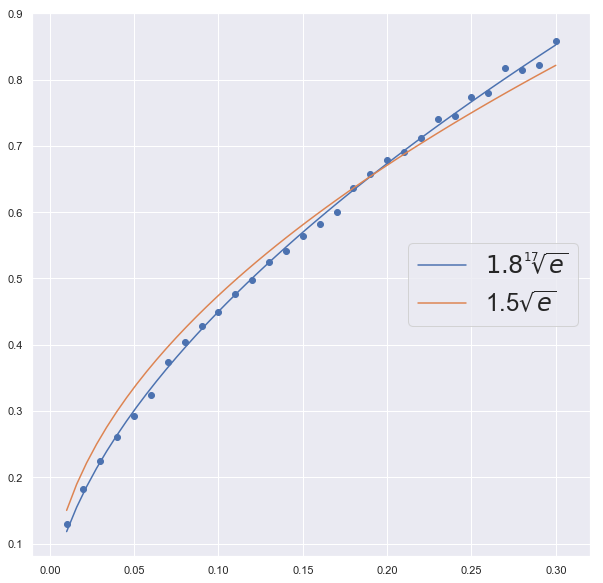

[1.71657951 1.71988561]
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]


In [194]:
# ok great now plot a(x)
err_arr
all_best_vals
all_as = [fit[0] for fit in all_best_vals]

def root_fit(x, a, b):
    return a*x**(1/b)

# try two curve fit
init_guess = [1, 1]
best_vals_root, covar_root = scipy.optimize.curve_fit(root_fit, err_arr, all_as, p0=init_guess)

# plot all the a's
plt.figure(figsize=(10,10))

plt.scatter(err_arr, all_as)

demo_x_arr = np.linspace(err_arr[0], err_arr[-1], num=50)
plt.plot(demo_x_arr, root_fit(demo_x_arr, best_vals_root[0], best_vals_root[1]), label=r'$1.8\sqrt[17]{e}$')
plt.plot(demo_x_arr, 1.5*demo_x_arr**(1/2), label=r'1.5$\sqrt{e}$')

ax = plt.axes()
ax.legend(loc='center right', fontsize=24)
plt.show()
print(best_vals_root)